In [16]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Set a random seed for reproducibility
np.random.seed(0)

# Load your temperature dataset with columns "Date" and "Temperature"
data = pd.read_csv('AirPassengers.csv')

# Make sure your "Date" column is in datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Sorting the data by date (if not sorted)
data = data.sort_values(by='Month')

# Resetting the index
data.set_index('Month', inplace=True)

data.dropna(inplace=True)


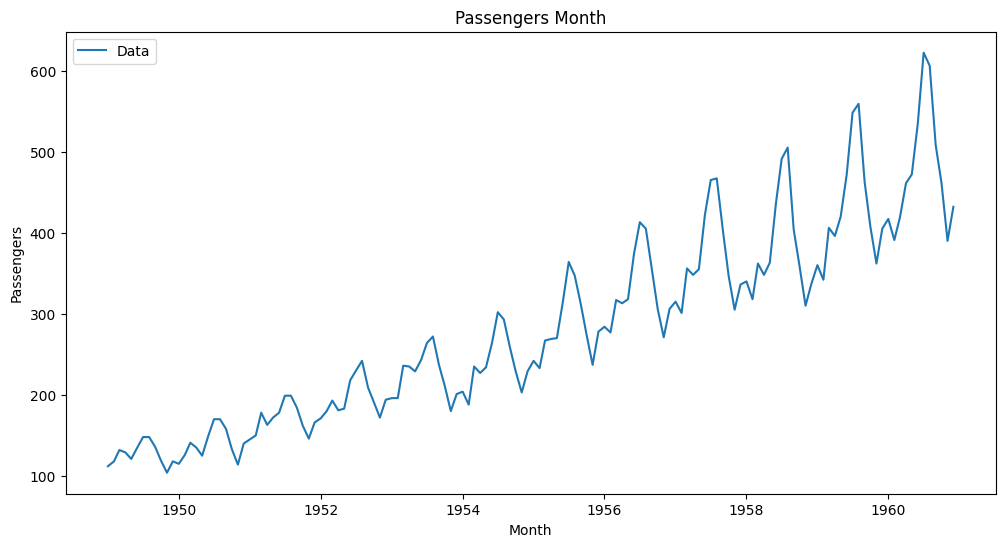

In [18]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot( data['#Passengers'], label='Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('Passengers Month')
plt.show()


In [19]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	data[f'Lag_{i}'] = data['#Passengers'].shift(i)

# Drop rows with NaN values resulting from creating lag features
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Define the input features (lag features) and target variable

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']


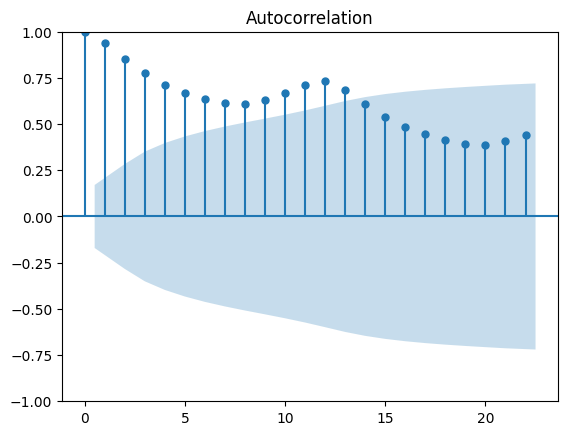

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
series = data['#Passengers']
plot_acf(series)
plt.show()


In [21]:
data['#Passengers'].corr(data['#Passengers'].shift(1))


0.9534698127349908

In [22]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the autoregressive model
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


c:\Users\71528\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 21.29
Root Mean Squared Error: 27.12


c:\Users\71528\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
sarima=SARIMAX(y_train, order=(1,1,2),seasonal_order=(10,0,1,12))
sarima_fit=sarima.fit()
print(sarima_fit.summary())

c:\Users\71528\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\71528\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\71528\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\71528\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

                                       SARIMAX Results                                       
Dep. Variable:                           #Passengers   No. Observations:                  105
Model:             SARIMAX(1, 1, 2)x(10, 0, [1], 12)   Log Likelihood                -402.655
Date:                               Tue, 23 Jul 2024   AIC                            835.310
Time:                                       14:22:42   BIC                            874.975
Sample:                                   01-01-1950   HQIC                           851.379
                                        - 09-01-1958                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8518      0.185      4.613      0.000       0.490       1.214
ma.L1      

In [26]:
print("hello")

hello
